# Results for GCP Rayleigh

In [171]:
from scipy.io import loadmat 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Construction error of the gcp rayleigh method:

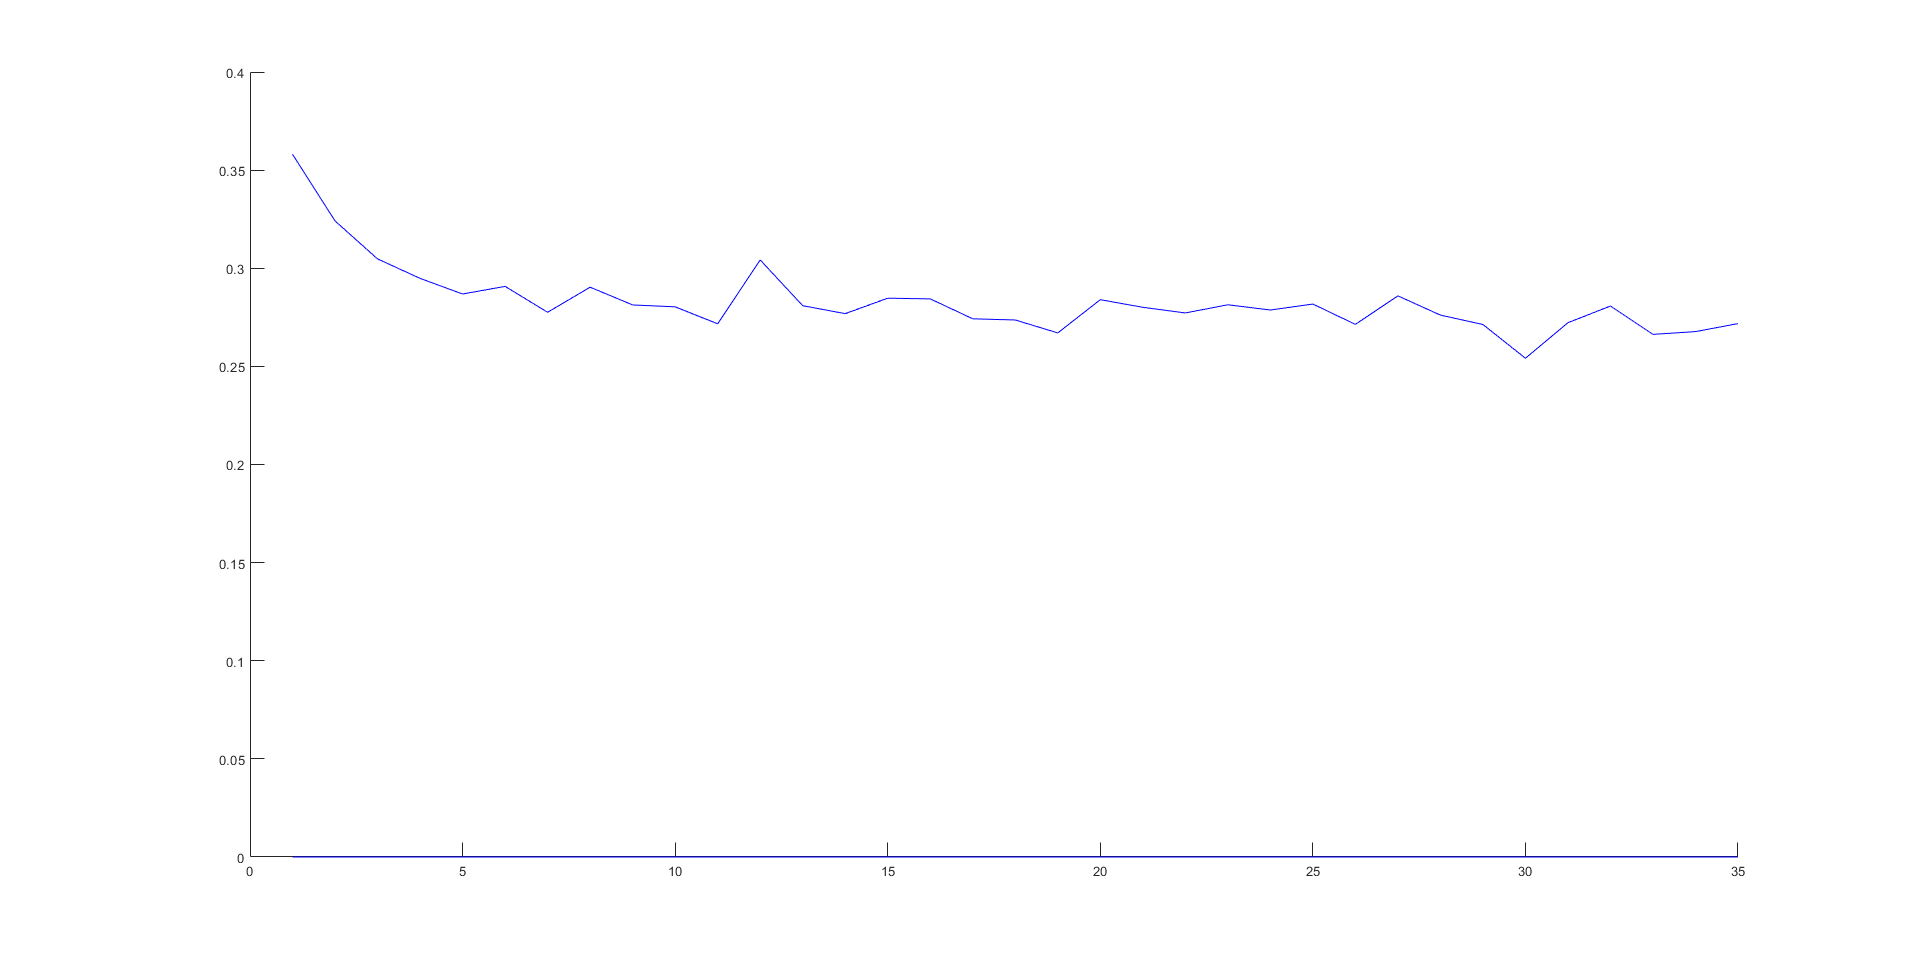

### Visualizing the first 35 factors after running the gcp rayleigh method on the face data:

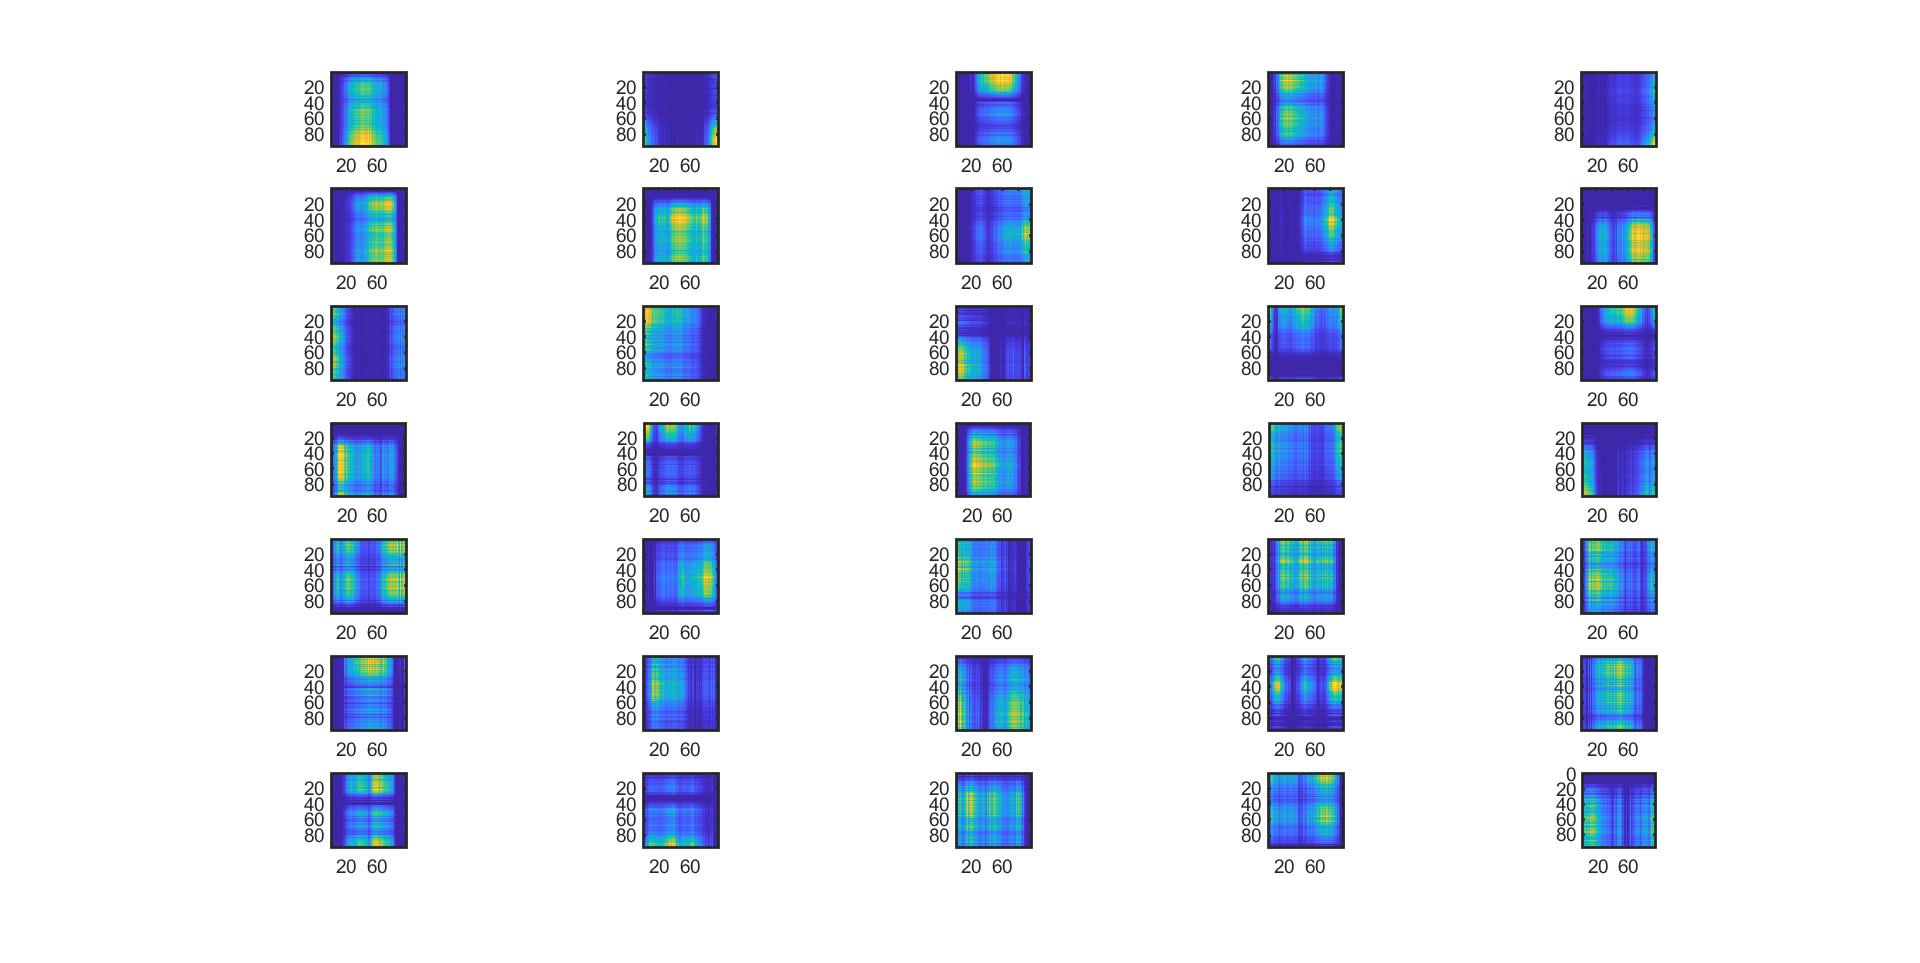

In [158]:
F = loadmat('factors_gcp_rayleigh.mat')['F']

In [159]:
F.shape

(1000, 35)

In [160]:
pca = PCA(30)

In [161]:
X = pca.fit_transform(F)

Text(0.5, 1.0, 'Principal Values')

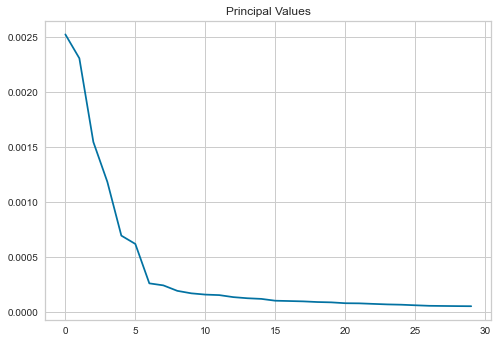

In [162]:
## eigenvalues
plt.plot(pca.explained_variance_)
plt.title('Principal Values')

In [163]:
X.shape

(1000, 30)

In [172]:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

<IPython.core.display.Javascript object>


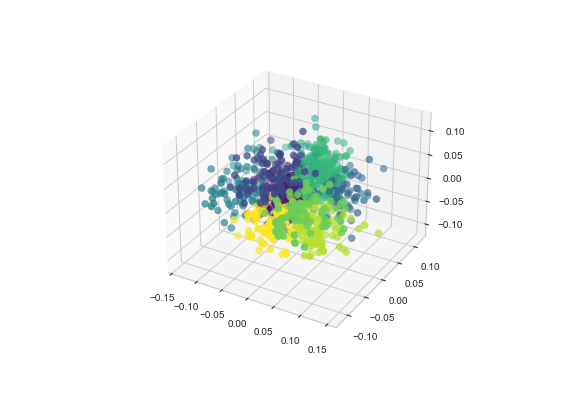

In [175]:
%matplotlib notebook_
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=clusters, s=50, cmap='viridis')

In [32]:
silhouette_score(X, clusters)

0.5709261452721732

## find the optimal number of clusters, $k$

Solutions: 
1. gap statistics https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29
2. elbow method https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
I chose to use the elbow method which seemed to be the most popular one.

Documentation for yellowbrick: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


In [45]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


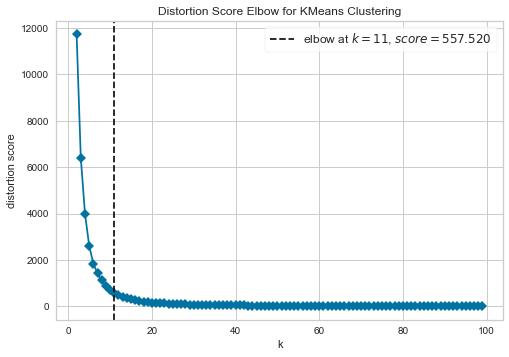

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,100), metric='distortion', timings= False)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

From the above plot, we observed that the elbow value is at K = 11, showing that the optimal number of clusters is 11. Thus we re-run the kmeans clustering with K = 11.

In [165]:
K = 10
kmeans = KMeans(init="random", n_clusters=K, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

In [57]:
faces_original_data = loadmat('faces_norm1.mat')['Data']

## test plot for the second cluster

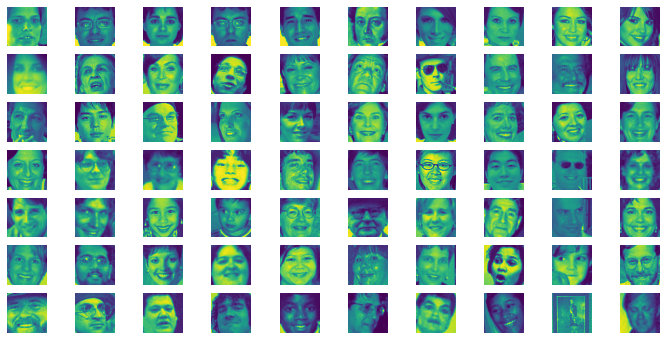

In [166]:
faces_clusters =  [[] for k in range(K)] 
for i in range(1000):
    faces_clusters[clusters[i]].append(faces_original_data[i,:])

nfaces = np.zeros(K,dtype=int)
## number of faces in the kth cluster:
nfaces[2] = len(faces_clusters[2])
nrow = int(nfaces[2]/10)
fig, axs = plt.subplots(nrow, 10, figsize = (12,6))
for i , ax in enumerate(axs.flatten()):
    img = faces_clusters[2][i].T.reshape(96,96)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
I = i + 1

fig, axs2 = plt.subplots(1, nfaces[2] - nrow * 10, figsize = (2.5,6))
for _,ax in enumerate(axs2.flatten()):
    img = faces_clusters[2][I].T.reshape(96,96)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
    I = I + 1  
plt.tight_layout()

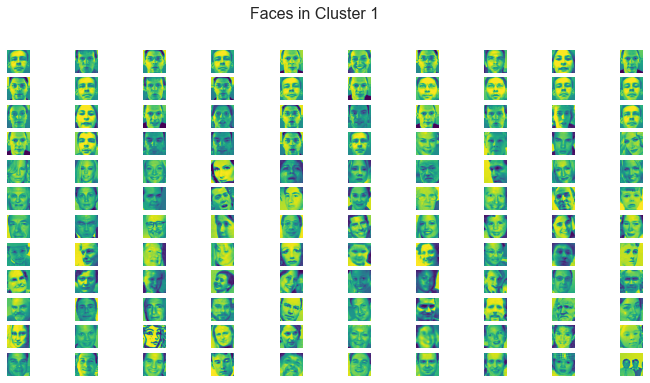

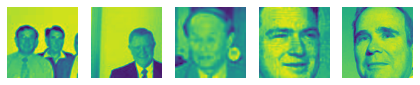

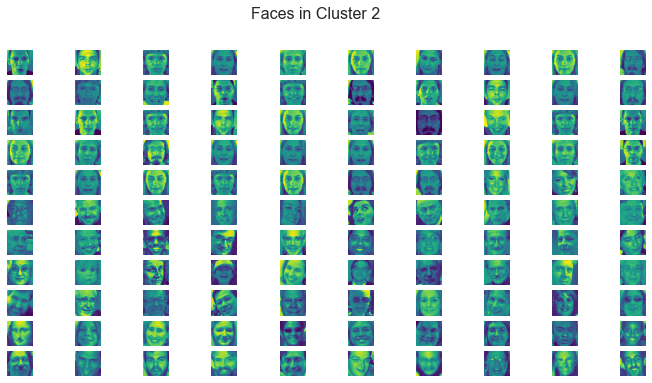

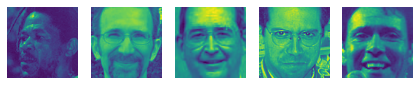

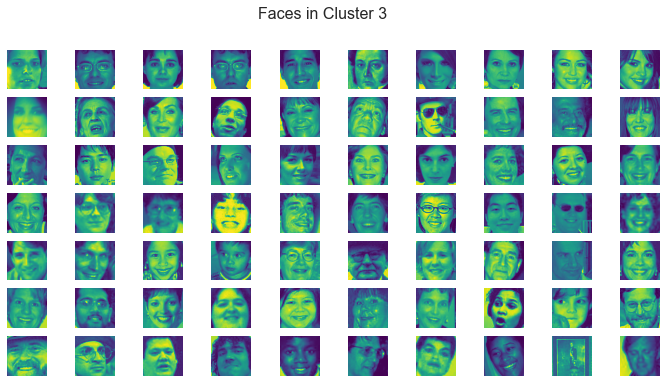

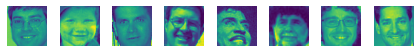

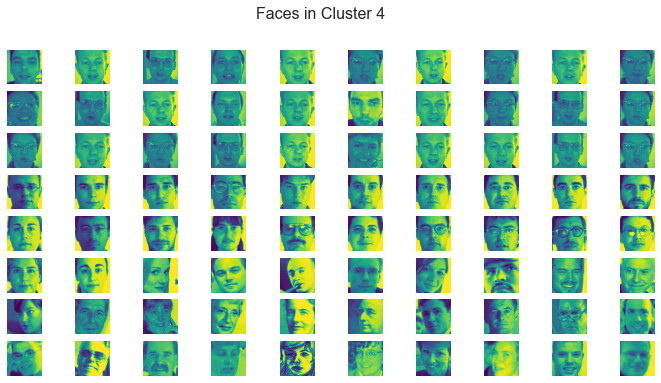

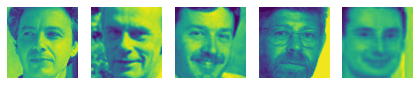

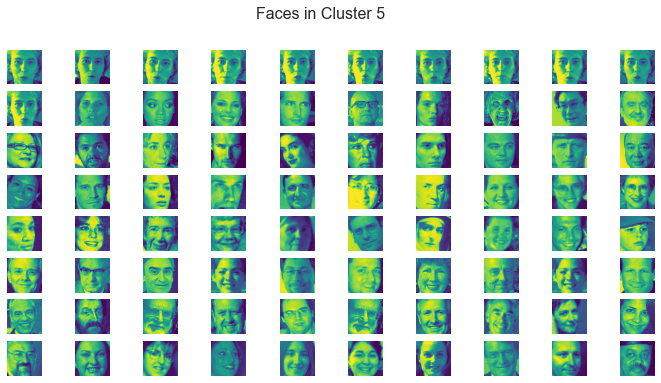

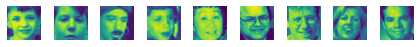

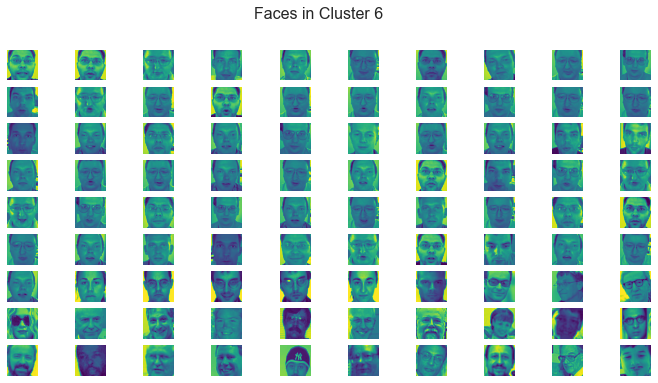

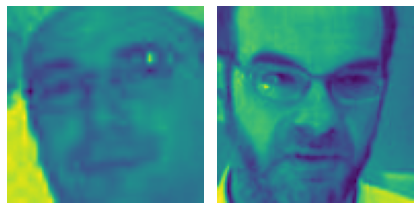

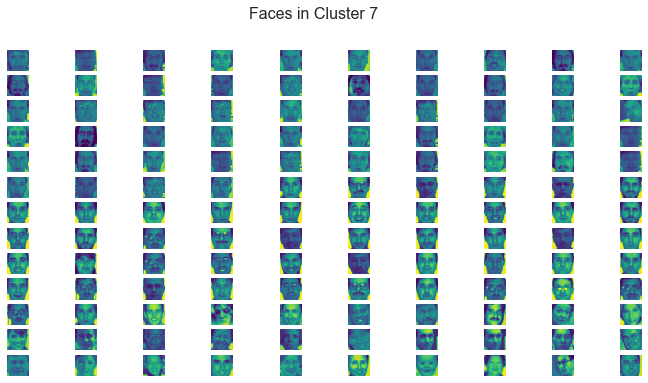

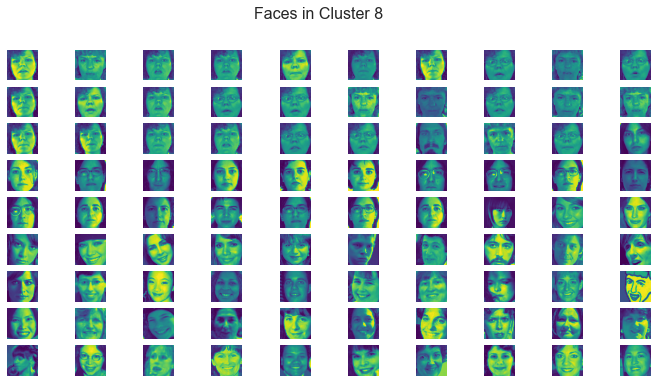

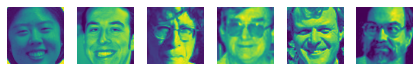

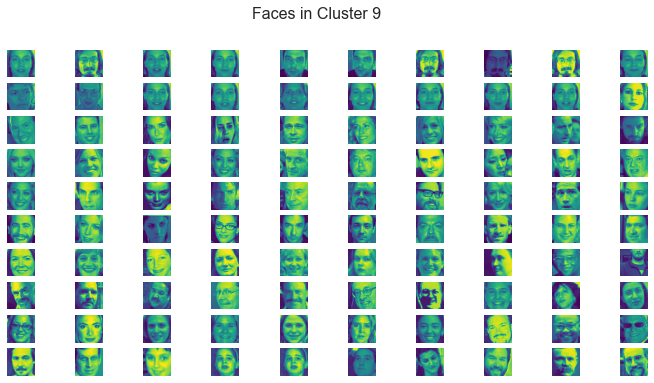

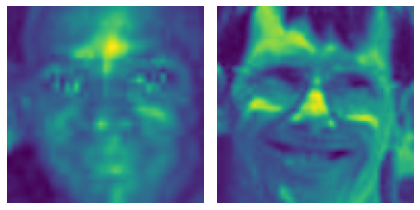

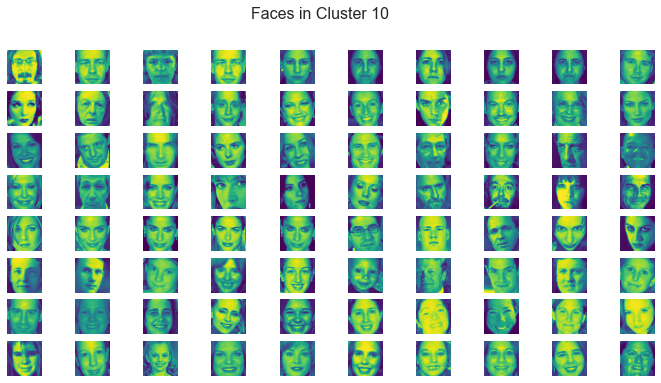

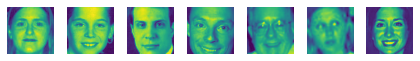

In [167]:
nfaces = np.zeros(K,dtype=int)
for k in range(0,K):
    ## number of faces in the kth cluster:
    nfaces[k] = len(faces_clusters[k])
    nrow = int(nfaces[k]/10)
    fig, axs = plt.subplots(nrow, 10, figsize = (12,6))
    for i , ax in enumerate(axs.flatten()):
        img = faces_clusters[k][i].T.reshape(96,96)
        ax.imshow(img, cmap = 'viridis')
        ax.axis('off')
    fig.suptitle('Faces in Cluster ' + str(k + 1), fontsize=16)
    
    if nfaces[k] - nrow * 10 != 0:
        I = i + 1
        if nfaces[k] - nrow * 10 == 1:
            img = faces_clusters[k][I].T.reshape(96,96)
            plt.imshow(img, cmap = 'viridis')
            plt.axis('off')
        else:
            fig, axs = plt.subplots(1, nfaces[k] - nrow * 10, figsize = (6,6))
            for i,ax in enumerate(axs):
                img = faces_clusters[k][I].T.reshape(96,96)
                ax.imshow(img, cmap = 'viridis')
                ax.axis('off')
                I = I + 1  
            plt.tight_layout()

In [ ]:
## hashing for more efficient storage
## how to measure whether the clustering is good? 

## evaluate the performance of clustering

In [168]:
silhouette_score(X, clusters)

0.11685159459370532

In [169]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, clusters)

1.8936996023347672

In [170]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, clusters)

95.0445236376305